In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '../preprocessed_winemag-data copy.csv'  
df = pd.read_csv(file_path)

df.head()

,id,country,description,designation,points,price,province,title,variety,winery
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
1,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
2,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
3,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
4,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo


<Axes: xlabel='winery'>

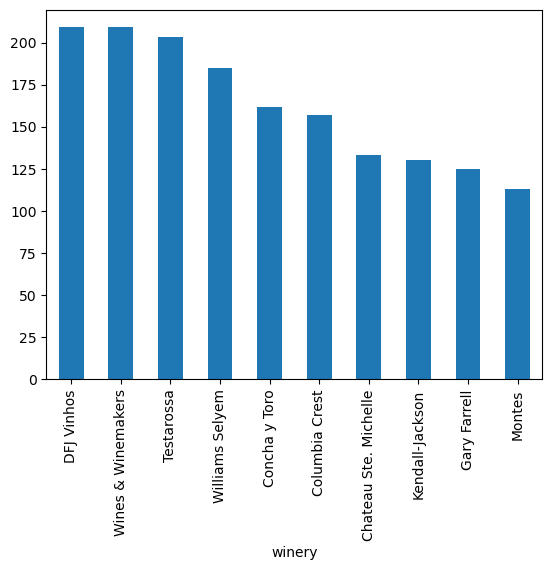

In [3]:
df_short = df.copy()
# kirkland = df[df['winery']=='Kirkland Signature'].iloc[:10].copy()
# df_short = pd.concat([df_short, kirkland])
df_short.to_csv('short_wines.csv')
df_short.winery.value_counts().head(10).plot.bar()

In [4]:
df_short.shape

(86148, 10)

In [4]:
import pandas as pd
from collections import Counter

# Define the function to get the top 5 most common elements in order
def top_5_common_ordered(x):
    return [item for item, _ in Counter(x).most_common(5)]

# Grouping the data by 'winery'
grouped = df.groupby(['winery'])

# Aggregating the required information
result = grouped.agg({
    'country': top_5_common_ordered,     # Top 5 countries
    'province': top_5_common_ordered,    # Top 5 provinces
    'price': lambda x: set(x),           # Set of all prices
    'points': lambda x: set(x),          # Set of all scores
    'designation': top_5_common_ordered, # Top 5 designations
    'variety': top_5_common_ordered      # Top 5 varieties
}).reset_index()

# Renaming columns to match requirements
result.columns = [
    'winery', 'country', 
    'provinces', 'prices', 
    'scores', 'designations', 'varieties'
]

def display_as_ordered_set(lst):
    return "{" + ", ".join(lst) + "}"

# Apply the display function to the relevant columns
result['country'] = result['country'].apply(display_as_ordered_set)
result['provinces'] = result['provinces'].apply(display_as_ordered_set)
result['designations'] = result['designations'].apply(display_as_ordered_set)
result['varieties'] = result['varieties'].apply(display_as_ordered_set)


# Adding the number of wines per winery
result['num_wines'] = grouped.size().values

In [5]:
result[result['winery'] == 'Kirkland Signature']

,winery,country,provinces,prices,scores,designations,varieties,num_wines
6244,Kirkland Signature,"{US, France, Italy, New Zealand, Spain}","{California, Washington, Rhône Valley, Tuscany...","{7.0, 8.0, 9.0, 10.0, 12.0, 13.0, 14.0, 15.0, ...","{80, 82, 84, 85, 86, 87, 88, 89, 90, 91, 93}","{Signature Series, Mountain Cuvée, Series, Old...","{Cabernet Sauvignon, Red Blend, Chardonnay, Zi...",40


In [6]:
result.to_csv('wineries_info.csv', index=False)

In [7]:
result

,winery,country,provinces,prices,scores,designations,varieties,num_wines
0,1+1=3,{Spain},{Catalonia},"{16.0, 18.0, 20.0}","{89, 82, 86, 87}","{Rosé, Cygnus Brut Nature Reserva Made With Or...","{Sparkling Blend, Cabernet Sauvignon}",6
1,10 Knots,{US},{California},"{35.0, 21.0}","{81, 83}","{Beachcomber, Moonraker}","{Rhône-style White Blend, Grenache}",2
2,100 Percent Wine,{US},{California},{18.0},"{89, 84}",{All Profits to Charity},"{Sauvignon Blanc, Red Blend}",2
3,1000 Stories,{US},{California},{19.0},"{90, 91}","{Bourbon Barrel Aged, Bourbon Barrel Aged Batc...",{Zinfandel},2
4,12 Linajes,{Spain},{Northern Spain},"{25.0, 35.0, 60.0, 33.0}","{88, 91, 92}","{Reserva, Crianza}",{Tempranillo},5
...,...,...,...,...,...,...,...,...
11757,Órale,{US},{California},{30.0},{91},{Cabronita},{Rhône-style Red Blend},1
11758,Öko,{Argentina},{Mendoza Province},{11.0},{85},{Made With Organically Grown Grapes},{Malbec},2
11759,Ökonomierat Rebholz,{Germany},{Pfalz},"{48.0, 50.0, 90.0, 45.0}","{89, 91, 95}","{Von Rotliegenden Spätlese, Vom Muschelkalk Sp...","{Riesling, Spätburgunder}",4
11760,àMaurice,{US},{Washington},"{65.0, 33.0, 35.0, 34.0, 38.0, 40.0, 45.0, 47....","{88, 89, 90, 91, 92, 93}","{Fred Estate, Boushey Vineyard, Gamache Vineya...","{Syrah, Malbec, Bordeaux-style Red Blend, Cabe...",24


In [8]:
result['Number of Wines'].sort_values(ascending=False).head(10)

KeyError: 'Number of Wines'

In [ ]:
winery_data = pd.read_csv('../winery_data.csv')